Comp Phys HW #8

Adam Goldenberg

Python 3 code

Particle in a box: Energy Levels

This finds the solution to the equation by subtracting the square root part from both sides to move it to the other side. This makes the equation equal to 0, and thus its roots will be the solution. z0 was calculated to be 6.5812e8 / c (the speed of light). The math is in the attached PDF.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as sy

In [2]:
z0 = 2.19525202

def tanP(z):
    return np.tan(z)

def sqrP(z):
    part = z0 / z
    part = part * part
    return math.sqrt(part - 1)

def F(z):
    return (tanP(z) - sqrP(z))

In [3]:
z = 0.1
print(tanP(z))
print(sqrP(z))
print(F(z))

0.10033467208545055
21.92973194390228
-21.82939727181683


Ploting the parts of F individually to se where they intersect.

In [4]:
xRange = np.arange(0.0001, 1.9999, 0.001)
tanPart = np.zeros(len(xRange))
sqrPart = np.zeros(len(xRange))

for i in range(0, len(xRange)):
    tanPart[i] = tanP(xRange[i])
    sqrPart[i] = sqrP(xRange[i])

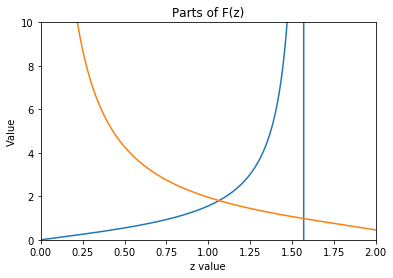

In [5]:
plt.title("Parts of F(z)")
plt.xlabel("z value")
plt.ylabel("Value")
plt.plot(xRange, tanPart)
plt.plot(xRange, sqrPart)
plt.ylim(0, 10)
plt.xlim(0, 2)
plt.show()

As we can see from the above plot, the two parts of the equation intersect once (the verticle blue line is the non-continuous part of the tan function)

Ploting F(z)

In [6]:
xRange = np.arange(0.001, 1.999, 0.001)
Farr = np.zeros(len(xRange))

for i in range(0, len(xRange)):
    Farr[i] = F(xRange[i])

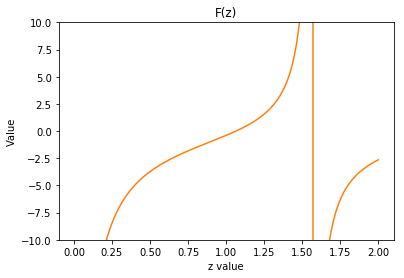

In [7]:
plt.plot(2)
plt.title("F(z)")
plt.xlabel("z value")
plt.ylabel("Value")
plt.plot(xRange, Farr)
plt.ylim(-10, 10)
#plt.xlim(0.01)
plt.show()

We can see the root we want to find in this graph between the values 0.75 and 1.25. This will use a bisection meathod from scipy to avoid discontinuitiy problems (cannot jump outside of continous part like other functions can)

In [8]:
from scipy import optimize

root = optimize.bisect(F, 0.75, 1.25)

print("The root is = " + str(root))

The root is = 1.0645235996034899


This is equal to z. Using the equation equating z and energy, the engergy is found (see pdf).

Projectile motion subject to a drag force

Part A]

In [9]:
alpha = 0.01

def split(v, ang):
    return (np.cos(ang) * v, np.sin(ang) * v)

#Takes a z[x, y, Vx, Vy] and gives the change (old function that we showed does not work)
def change(t, z):
    dx = z[2]
    dy = z[3]
    dVx = -(9.81) * z[0] * (1 / math.sqrt((z[0] * z[0]) + (z[1] * z[1])))
    part = alpha * ((z[2] * z[2]) + (z[3] * z[3])) * z[2]
    dVx = dVx - part
    dVy = -(9.81) * z[1] * (1 / math.sqrt((z[0] * z[0]) + (z[1] * z[1])))
    part = alpha * ((z[2] * z[2]) + (z[3] * z[3])) * z[3]
    dVy = dVy - part
    return np.array([dx, dy, dVx, dVy])

#Takes a z[x, y, Vx, Vy] and gives the change
def change2(t, z):
    dx = z[2]
    dy = z[3]
    dVx = -alpha * ((z[2] * z[2]) + (z[3] * z[3])) * z[2]
    dVy = -(9.81) - (alpha * ((z[2] * z[2]) + (z[3] * z[3])) * z[3])
    return np.array([dx, dy, dVx, dVy])

def traject(v, ang):
    Vx, Vy = split(v, ang)
    init = np.array([0, 0, Vx, Vy])
    return sy.solve_ivp(change2, (0,100), init, method='RK45', t_eval=np.arange(0,5,0.01))

In [10]:
A = traject(10, np.pi/4)

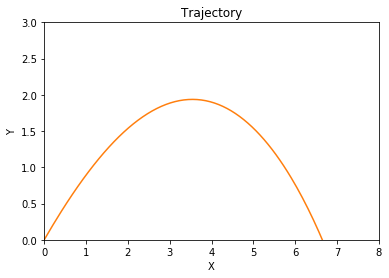

In [11]:
plt.plot(3)
plt.title("Trajectory")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(A.y[0], A.y[1])
plt.ylim(0, 3)
plt.xlim(0,8)
plt.show()

Part B and C]

In [12]:
runAng = np.arange(np.pi/100, np.pi/2, np.pi/100)
x_intersect = np.zeros(len(runAng))

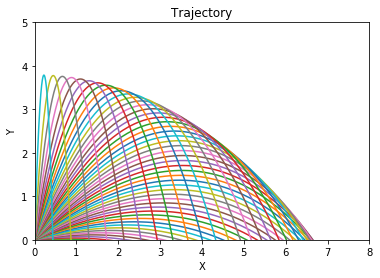

In [13]:
plt.plot(4)
plt.title("Trajectory")
plt.xlabel("X")
plt.ylabel("Y")

for i in range(0, len(runAng)):
    a = traject(10, runAng[i])
    plt.plot(a.y[0], a.y[1])
    index = np.argwhere(a.y[1] < 0)
    value = index[0][0]-1
    x_intersect[i] = a.y[0][value]

plt.ylim(0, 5)
plt.xlim(0,8)
plt.show()

In [14]:
print(x_intersect)

[0.58273223 1.13343441 1.65520711 2.1504124  2.62078433 3.06773644
 3.4198136  3.82572733 4.14281107 4.44377695 4.79250972 5.05931955
 5.3099763  5.48591238 5.70559843 5.9086455  6.04116553 6.21183218
 6.31436895 6.45125885 6.5222392  6.57753167 6.61671944 6.63936371
 6.64500328 6.59255321 6.56419603 6.47954154 6.41449796 6.29611176
 6.16062091 6.00755376 5.83645257 5.61782428 5.41097983 5.15899561
 4.91508453 4.62881576 4.32606515 3.98760194 3.65387383 3.30409467
 2.9248354  2.53417394 2.13284932 1.72171529 1.29568355 0.86995977
 0.4356238 ]


In [15]:
import scipy

def TestFunctionMax(ang):
    ang = math.radians(ang)
    Vx, Vy = split(10,ang)
    init = [0,0,Vx, Vy]
    a = scipy.integrate.solve_ivp(change2,(0,100),init,method='RK45',t_eval=np.arange(0,2,0.01))
    xvals = a.y[0]
    yvals = a.y[1]
    
    for i in range(len(yvals)):
        y = yvals[i]
        if y<0:
            return -1*xvals[i-1]

In [16]:
e =  optimize.brent(TestFunctionMax,brack=(0,math.pi/2))
print(str(e) + " degres")

44.027353454189424 degres
